# Welcome to the Eigenvalue Approximation Visualizer!

Description

## Prologue

Just run this once (click the cell and press the play button on the top bar or hit shift-enter) to import the matrix functions needed for this visualizer.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig

## Step 1: Input Matrix Size

Please run the cell below to input the size of the square matrix you would like to see the properties of. For example, to enter a 2x2 matrix, just enter "2" in the input prompt after running the cell.

In [21]:
# Get dimensions of matrix from user.
matrix_size = int(input("Please enter the height of your square matrix: "))

Please enter the height of your square matrix: 2


## Step 2: Input Matrix Values

Run the cell below to begin inputting each of the values in your matrix. The cell will prompt you for the value in position (1, 1), or the top left, first. Once you enter that value, it will prompt you for the value in position (1, 2) and so on until you reach position (n, n).

When entering values, either enter a real number, such as "12" or a complex number with "j" as the complex unit, such as "1+2j" or "5.3+2.5j".

In [22]:
# Prompt for user input for each value of the matrix.
matrix_values = []
for i in range(0, matrix_size):
    matrix_values.append([])
    for j in range(0, matrix_size):
        currentVal = input("Enter the value at position (" + str(i+1) + ", " + str(j+1) + "): ")
        currentVal = currentVal.replace(" ", "")
        matrix_values[i].append(complex(currentVal))
        
matrix = np.array(matrix_values)
print()
print("You have created the following matrix:")
print(matrix)

Enter the value at position (1, 1): 1
Enter the value at position (1, 2): 2+3j
Enter the value at position (2, 1): 4+5j
Enter the value at position (2, 2): 1+1j

You have created the following matrix:
[[1.+0.j 2.+3.j]
 [4.+5.j 1.+1.j]]


## Step 3: Approximating the Eigenvalues of Your Matrix

Gershgorin Circles can be used to approximate the eigenvalues of a matrix.

For an n x n matrix, the Gershgorin circles are the set of circles:

$R_{i} = \{ z \in \mathbb{C}; |z - a_{ii}| \leq \Sigma_{j=1, j\neq i}^{n} |a_{ij}|\}$

Equivalently, they are the circles which have center $a_{ii}$ and radius $\Sigma_{j=1, j\neq i}^{n} |a_{ij}|$.

The eigenvalues of the matrix are contained within the union of these circles.

Additionally, the union of any $k$ of the circles that do not intersect the remaining $(n-k)$ circles contains precisely $k$ of the eigenvalues.

Run the cell below to calculate and display the the Gershgorin Circles of your matrix.

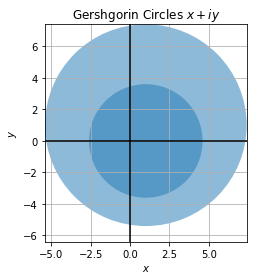

In [23]:
fig, ax = plt.subplots()

radii = []
x_vals = []
y_vals = []

# Find Gershgorin Circles
for i in range(matrix_size):
    x, y = matrix[i,i].real, matrix[i,i].imag
    radius = sum(abs(matrix[i,:])) - abs(matrix[i,i])
    
    radii.append(radius)
    x_vals.append(x)
    y_vals.append(y)
    
    ax.add_artist( plt.Circle((x, y), radius, alpha=0.5) )
    
# Find bounds of circles to scale plot
min_x = min(x_vals) - max(radii)
min_y = min(y_vals) - max(radii)
max_x = max(x_vals) + max(radii)
max_y = max(y_vals) + max(radii)


# Chart and axes titles
ax.axis([min_x, max_x, min_y, max_y])
ax.set_aspect(1)    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Gershgorin Circles $x + iy$")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.grid()

## Step 4: Find Actual Eigenvalues

Run the cell below to calculate the actual eigenvalues of your matrix. The cell will then display the eigenvalues on the same graph as the one above.

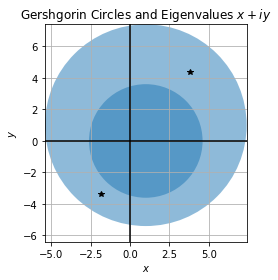

In [24]:
fig, ax = plt.subplots()

eigvals = np.linalg.eigvals(matrix)

# Plot Gershgorin Circles and Eigenvalues
for i in range(matrix_size):
    ax.add_artist( plt.Circle((x_vals[i], y_vals[i]), radii[i], alpha=0.5) )
    plt.plot(eigvals[i].real, eigvals[i].imag, 'k*')

# Chart and axes titles
ax.axis([min_x, max_x, min_y, max_y])
ax.set_aspect(1)    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Gershgorin Circles and Eigenvalues $x + iy$")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.grid()

## Step 5: View Other Matrix Properties

Run the cell below to view some other properties of your matrix, such as the spectral radius.

In [25]:
print("Spectral Radius: ")
print(max(eigvals))



Spectral Radius: 
(3.820799423017968+4.3996037471643845j)
